# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [18]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (6,4)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
from sklearn import metrics

In [13]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

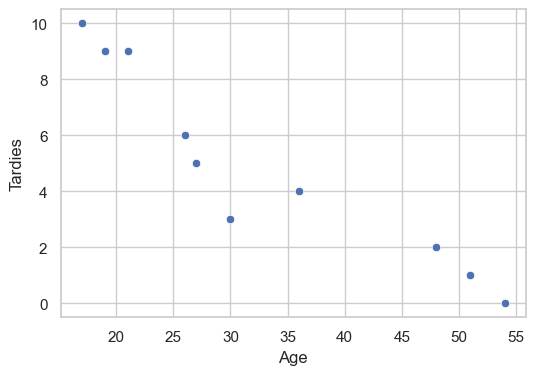

In [14]:
sns.scatterplot(x = "Age", y = "Tardies", data = student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# There's a negative correlation between Age and nº of Tardies.
# The number of tardies seem to depend on the Age of the student: the older the student, the less tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [16]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# Correlation is a metric that goes from 0 to 1 and indicates how the two variables are related: 
# the closer to one, the more related they are. A positive number indicates a positive correlation: if one goes up,
# the other goes up aswell. It indicates proportionality between the two variables.

# Covariance can take any number and indicates how the two variables vary: if they show a big covariance
# means that when one variable varies, the other varies aswell. The direction of the variation is indicated by
# the sign: if positive, they vary in the same direction.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Defining the variables:
X = student_data[['Age']]
y = student_data['Tardies']

In [35]:
type(X)

pandas.core.frame.DataFrame

In [20]:
# Instantiate a linear regression:
# Because we have seen that the two variables have a correlation close to -1.
student_lr = LinearRegression()

In [28]:
# Fit the model:
model = student_lr.fit(X, y)

In [29]:
# Getting the intercept and coeficient:
n = student_lr.intercept_
m = student_lr.coef_[0]
print(f"{round(n, 2)} is the intercept {round(m,2)}, while is the slope or coeficient")

12.89 is the intercept -0.24, while is the slope or coeficient


Plot your regression model on your scatter plot.

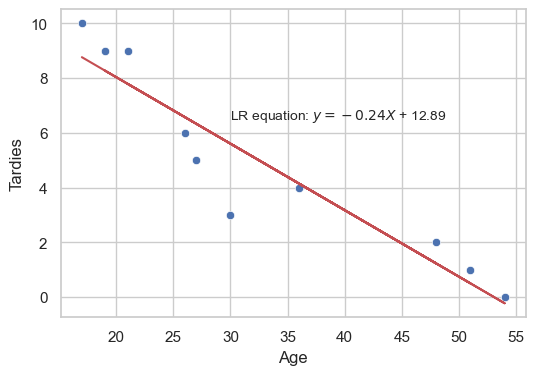

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
ax.text(30, 6.5, f'LR equation: $y = {round(m,2)}X$ + {round(n,2)}', fontsize=10)

sns.scatterplot(x = "Age", y = "Tardies", data = student_data)
plt.plot(X, model.predict(X), color='r');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [54]:
smf.ols("Tardies ~ Age", data=student_data).fit().summary()

C:\Users\mplan\anaconda3\envs\Ironhack\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        15:48:00   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared is 0.882 which is a pretty good correlation coeficient value.
# We can say that the age is a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [65]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
vehicles.corr()

# According to the correlation matrix, the variables that will be most important at determining CO2 emissions are:
# Fuel Barrels/Year, Highway MPG, Combined MPG and Fuel Cost/Year (abs(corr) > 0.9)
# The one that will affect the least is Year, and is the one that we should omit (look at the pairplot below)

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


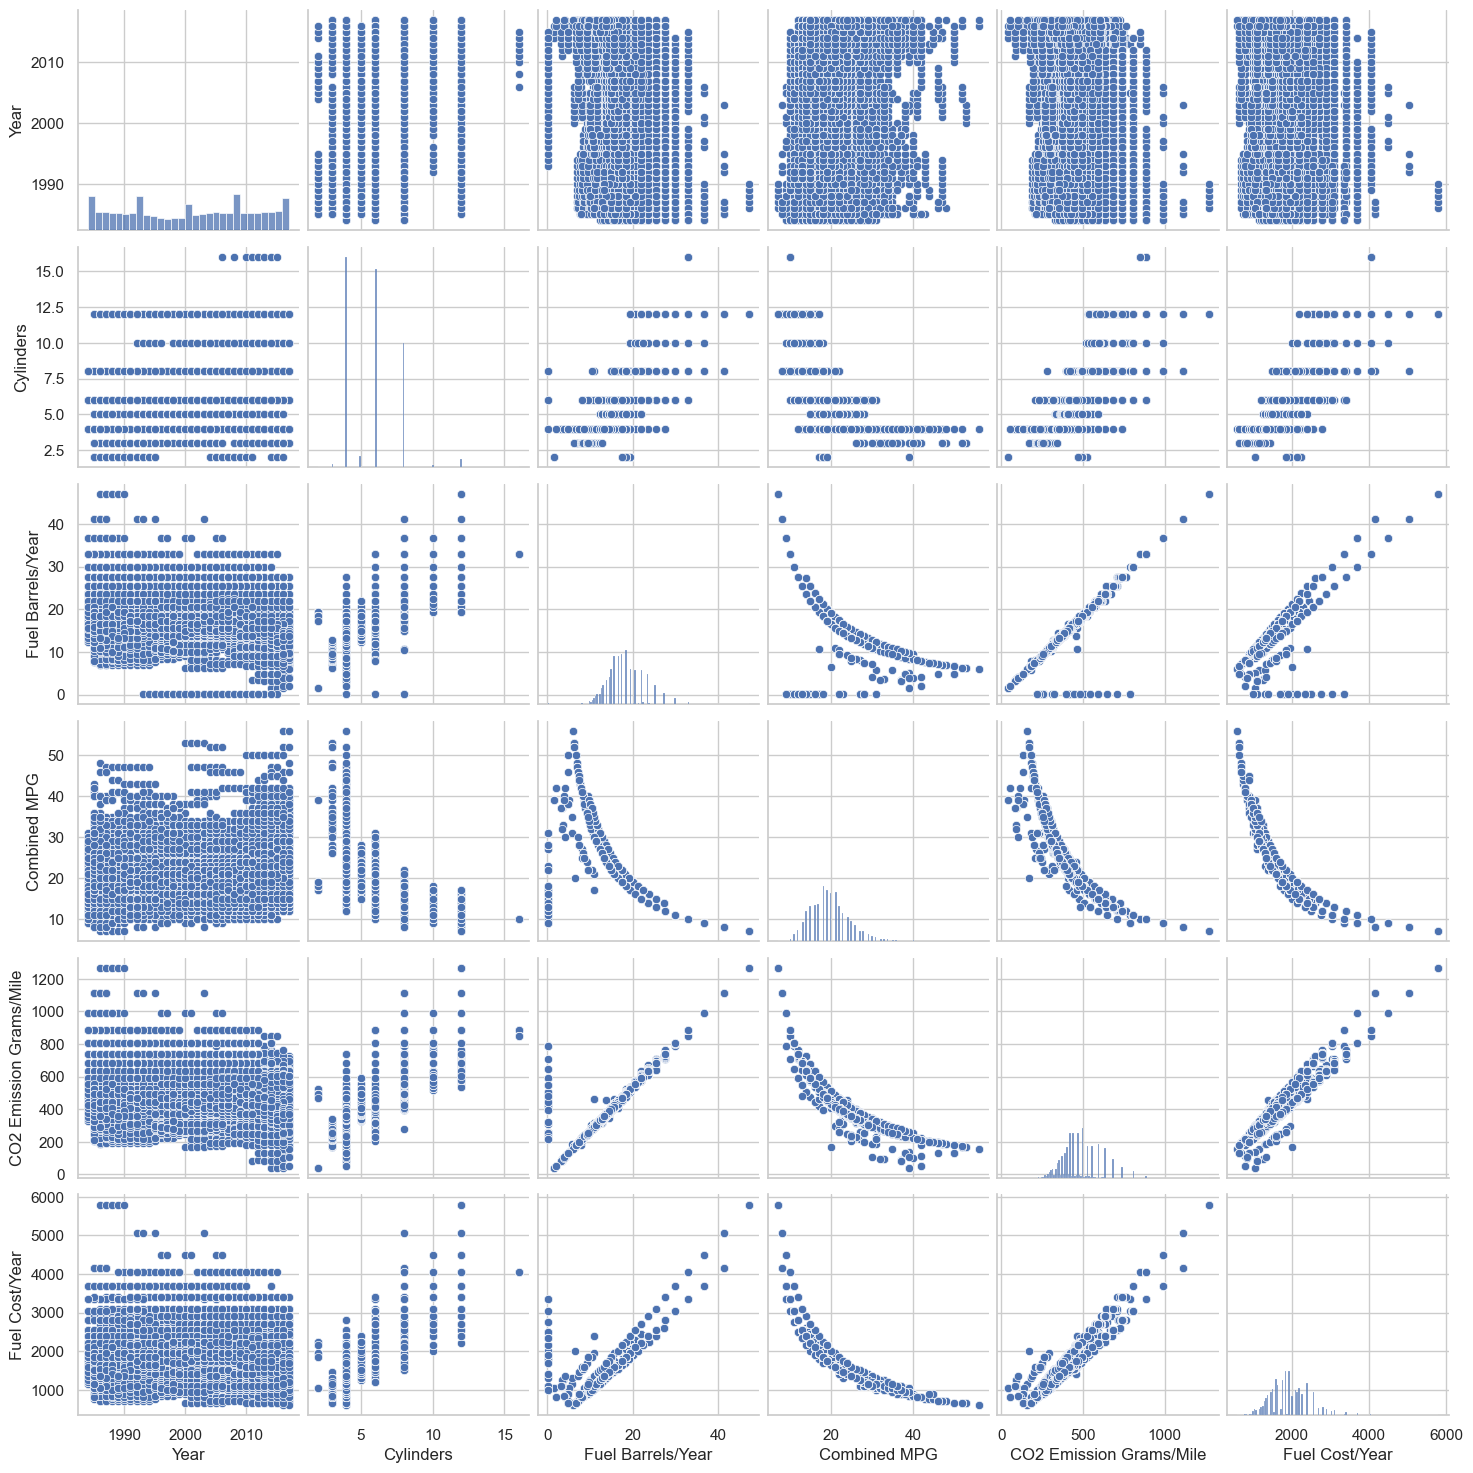

In [112]:
sns.pairplot(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [75]:
# I am using a linear regression although Combined MPH is actually exponential.

results = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ vehicles['Cylinders'] + vehicles['Fuel Barrels/Year'] + vehicles['Combined MPG'] + vehicles['Fuel Cost/Year']", data=vehicles).fit()
results

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [74]:
results.summary()

# The most important variables will be those with greater coeficient
# The magnitude of that importance also depends on the actual unit of that variable
# For instance, Fuel Barrels/Year has a coef of 19.6 and the units are in the order of 20s: 19.6 x 20 = 392
# Fuel Cost/Year has a coef of 0.0294 and units are in the order of 2000s: 0.0294 x 2000 = 58.8

# In order of most to least important:
    # 1. Fuel Barrels/Year
    # 2. Combined MPG (negatively)
    # 3. Fuel Cost/Year
    # 4. Cylinders

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.980
Model:                                             OLS   Adj. R-squared:                  0.980
Method:                                  Least Squares   F-statistic:                 4.470e+05
Date:                                 Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                         16:10:57   Log-Likelihood:            -1.5226e+05
No. Observations:                                35952   AIC:                         3.045e+05
Df Residuals:                                    35947   BIC:                         3.046e+05
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       131.1563      1.688     77.714      0.000     127.848     134.464
vehicles['Cylinders']             1.0448      0.080     12.993      0.000       0.887       1.202
vehicles['Fuel Barrels/Year']    19.6271      0.060    329.809      0.000      19.510      19.744
vehicles['Combined MPG']         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
vehicles['Fuel Cost/Year']        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [99]:
# Building the df:
party = pd.DataFrame({"invited" : [1,3,4,6,8,9,11,14], "attended" : [1,2,4,4,5,7,8,13]})
party['no_attended'] = party['invited'] - party['attended']
party

,invited,attended,no_attended
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [100]:
# Defining the variables:
X = party[['invited']]
y = party['no_attended']

# Instantiate model:
party_lr = LinearRegression()

# Fit the model:
model = party_lr.fit(X, y)
model

LinearRegression()

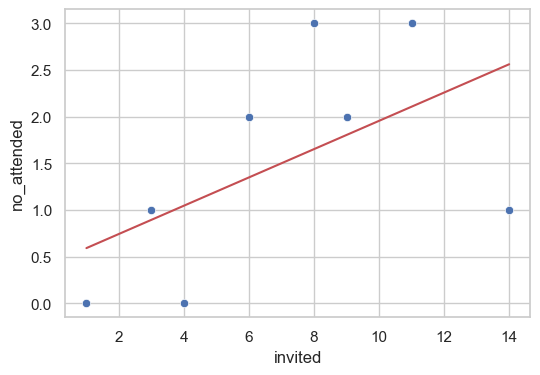

In [101]:
sns.scatterplot(x = "invited", y = "no_attended", data = party)
plt.plot(X, model.predict(X), color='r');

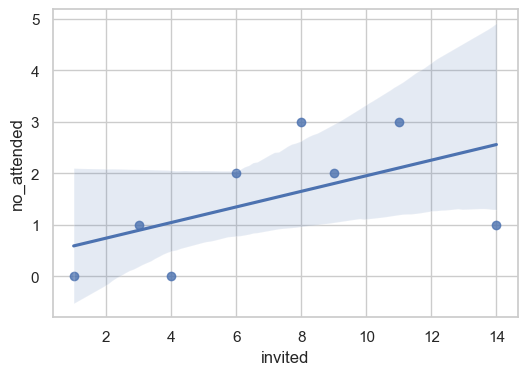

In [102]:
# Ploting with regplot:
sns.regplot(x = "invited", y = "no_attended", data = party);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [103]:
# There is a positive correlation: the more people invited the more that don't attent.

In [104]:
# Looking at the summary

results = smf.ols("no_attended ~ invited", data=party).fit()
results.summary()

C:\Users\mplan\anaconda3\envs\Ironhack\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_attended   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2.609
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.157
Time:                        16:56:17   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4394      0.759      0.579      0.584      -1.418       2.297
invited        0.1515      0.094      1.615      0.157      -0.078       0.381
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                          -0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# The R2 is 0.3, indicating that the model as it is does not fit very well the data.
# In the summary of the model, we see that the p-value of the invited variable is > 0.05, which indicates
# that it really does not impact the model.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [106]:
# There's a day where 14 people were invited but and all but 1 attended, which is rare looking at the trend and
# might be an outlier in our data.

In [107]:
# Removing that point:

party = party[party['invited'] != 14]
party

,invited,attended,no_attended
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3


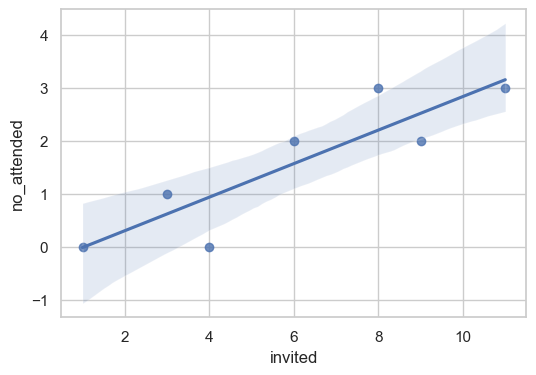

In [108]:
# The regression line seems to fit better the data:
sns.regplot(x = "invited", y = "no_attended", data = party);

In [109]:
# Looking at the summary:
results = smf.ols("no_attended ~ invited", data=party).fit()
results.summary()

C:\Users\mplan\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_attended   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00839
Time:                        16:56:18   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3233      0.513     -0.630      0.556      -1.642       0.996
invited        0.3158      0.075      4.213      0.008       0.123       0.508
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                          -0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Now the R2 is 0.78, which is way bigger than before and indicates a better fitting for the model.
# In addition, now the p-value of the invited people is 0.008, indicating that
# the number of invited people does indeed affect the model